## 배깅과 부스팅

앙상블기법
1) 배깅- RandomForest
2) G.B 

공통점: 의사결정트리
배깅
- 각각의 모델들이 만들어짐.
- 각각의 모델들을 약한 분류기라고 보지 않음.
- 정확도를 높이기 위해 여러 개의 모델을 만든다.
- 그 중에서 가장 많이 등장했거나 다수결의 원칙[ 평균 ]으로 선택
= 병렬적 결합 방법
부스팅
- 모델들이 하나의 연장선상에 있다.
- 첫 모델은 약한 분류기, 그래서 이를 보완하여 다음모델..
=> 보완해가면서 나아가는 모델
- 순차적 결합 방법
- 판별함수로 경사하강법을 이용
=> 틀린 데이터들에 대한 과적합 문제
해결책: Adabost (에이다부스타)
-회귀식을 이용한 강한 학습기
## F(x) = a1*f1(x)+a2+f2(X) ...
-오류가 가장 큰 모델의 가중치를 더 크게 준다.


In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
cancer=load_breast_cancer()

In [16]:
X_train, X_test, y_train,y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

print("훈련 데이터 적합도 :", gbrt.score(X_train,y_train))
print("테스트 데이터 정확도 :", gbrt.score(X_test,y_test))

훈련 데이터 적합도 : 1.0
테스트 데이터 정확도 : 0.958041958041958


In [17]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train,y_train)

print("훈련 데이터 적합도 :", gbrt.score(X_train,y_train))
print("테스트 데이터 정확도 :", gbrt.score(X_test,y_test))

훈련 데이터 적합도 : 0.9882629107981221
테스트 데이터 정확도 : 0.965034965034965


In [18]:
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)

print("훈련 데이터 적합도 :", gbrt.score(X_train,y_train))
print("테스트 데이터 정확도 :", gbrt.score(X_test,y_test))

훈련 데이터 적합도 : 0.9906103286384976
테스트 데이터 정확도 : 0.972027972027972


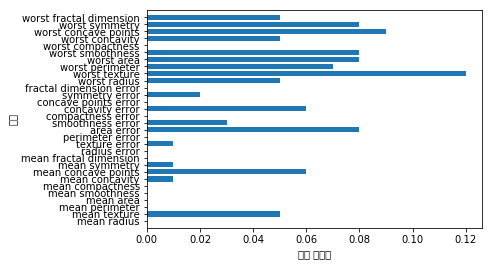

In [20]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(gbrt)

선형 모델과 비선형 특성

In [21]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Support Vector Machine

비선형의 경우, 커널트릭을 이용한다.
* cost(C) - 너무 낮으면 과소적합 높으면 과대적합
( 선형 svm일 때 )
* 커널트릭
- 실제로는 아니지만 차원을 늘린 것처럼 이용하는 것
- 가우시안-RBF 
* 가우시안 - 확률누적으로 바꾸면 정규분포모양
* gamma - 작으면 폭이 넓고 크면 폭이 좁아진다.

=> 사전에 pca분석으로 중요변수들로 줄여서 분포를 볼 수 있다.

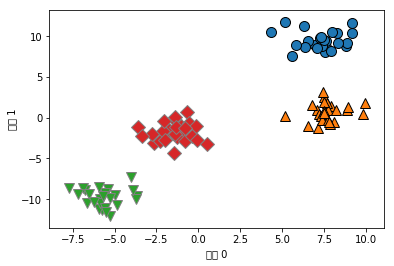

In [27]:
X, y = make_blobs(centers=4, random_state=8)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

Text(0.5,0,'특성 1')

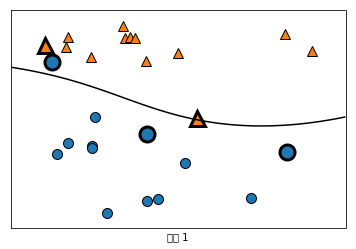

In [32]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel ='rbf', C=10, gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)

mglearn.discrete_scatter(X[:,0],X[:,1], y)
sv = svm.support_vectors_

sv_labels=svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0],sv[:,1], sv_labels, s=15, markeredgewidth =3)
plt.xlabel("특성 0")
plt.xlabel("특성 1")